In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Packages and Understand data

In [3]:
# import packages and load data from csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA01/house-price-train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
# Part 1: Understanding the data- I will being exploring the dataset by looking at some basic statistical insights
# Let's look at the first 5 rows of the dataset to get an idea of each of the features and outputs
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
# Now I will dive deeper and take a look into the data type of each column and account foe non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Moving on, I am interested in taking a look at the statistical summary of the data
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
# Let's look at the shape of the data
df.shape

(1460, 81)

In [8]:
# Check for missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [149]:
# Check for cardinality
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Visualization

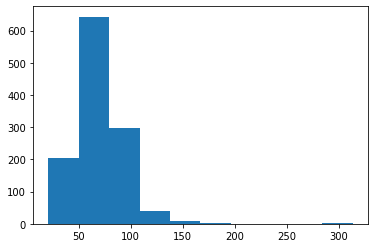

In [10]:
# Visualize each of the numerical variables
plt.hist(df['LotFrontage'])
plt.show()

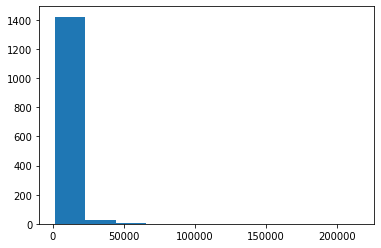

In [11]:
plt.hist(df['LotArea'])
plt.show()

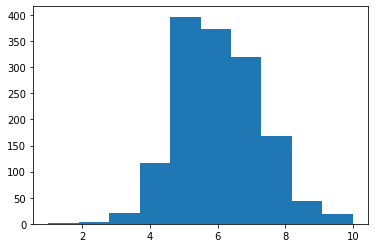

In [12]:
plt.hist(df['OverallQual'])
plt.show()

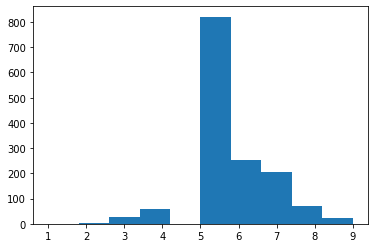

In [13]:
plt.hist(df['OverallCond'])
plt.show()

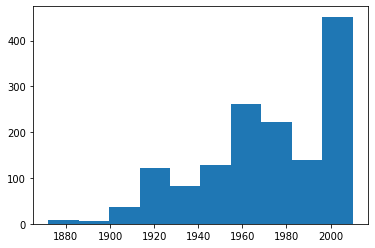

In [14]:
plt.hist(df['YearBuilt'])
plt.show()

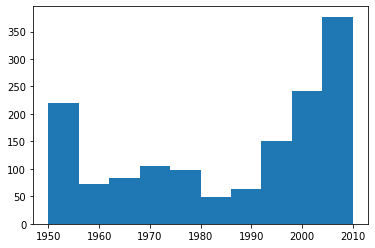

In [15]:
plt.hist(df['YearRemodAdd'])
plt.show()

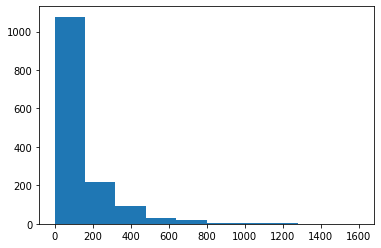

In [16]:
plt.hist(df['MasVnrArea'])
plt.show()

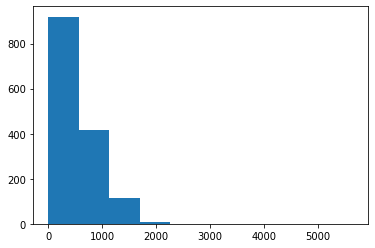

In [17]:
plt.hist(df['BsmtFinSF1'])
plt.show()

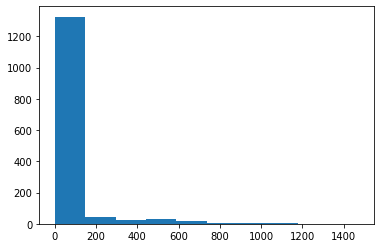

In [18]:
plt.hist(df['BsmtFinSF2'])
plt.show()

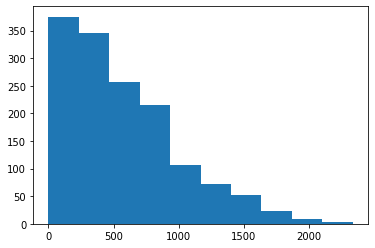

In [19]:
plt.hist(df['BsmtUnfSF'])
plt.show()

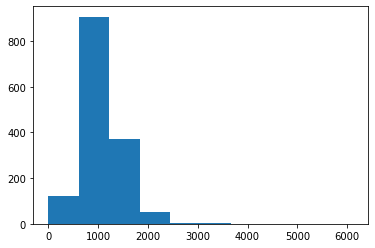

In [20]:
plt.hist(df['TotalBsmtSF'])
plt.show()

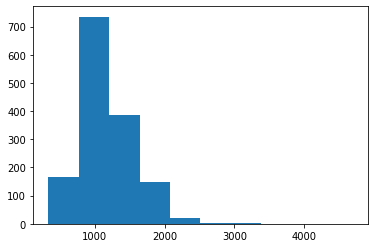

In [21]:
plt.hist(df['1stFlrSF'])
plt.show()

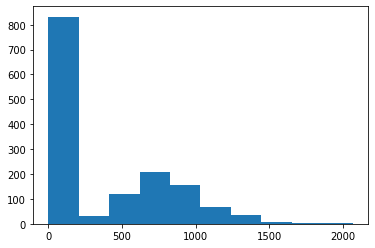

In [22]:
plt.hist(df['2ndFlrSF'])
plt.show()

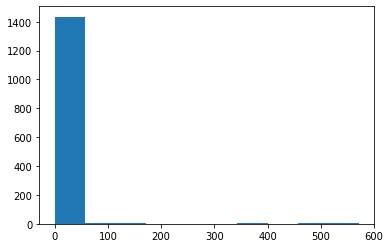

In [23]:
plt.hist(df['LowQualFinSF'])
plt.show()

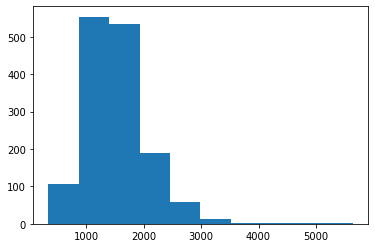

In [24]:
plt.hist(df['GrLivArea'])
plt.show()

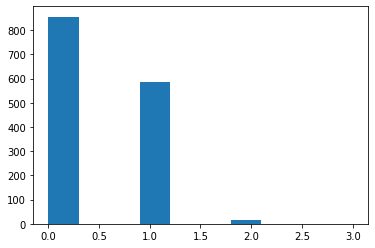

In [25]:
plt.hist(df['BsmtFullBath'])
plt.show()

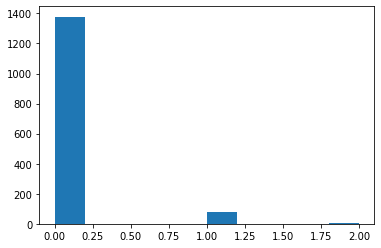

In [26]:
plt.hist(df['BsmtHalfBath'])
plt.show()

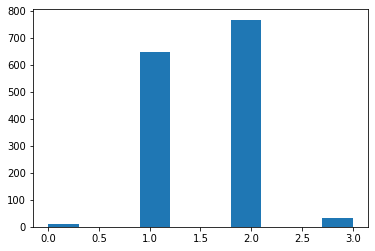

In [27]:
plt.hist(df['FullBath'])
plt.show()

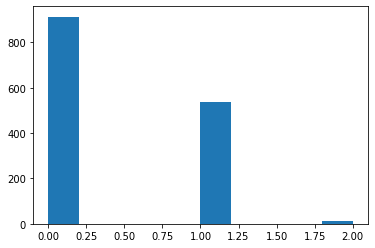

In [28]:
plt.hist(df['HalfBath'])
plt.show()

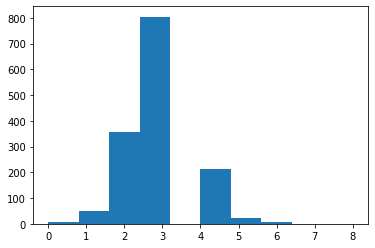

In [29]:
plt.hist(df['BedroomAbvGr'])
plt.show()

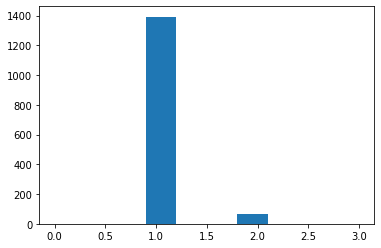

In [30]:
plt.hist(df['KitchenAbvGr'])
plt.show()

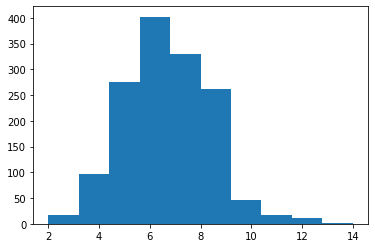

In [31]:
plt.hist(df['TotRmsAbvGrd'])
plt.show()

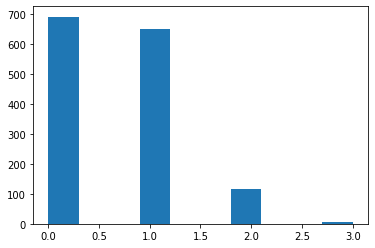

In [32]:
plt.hist(df['Fireplaces'])
plt.show()

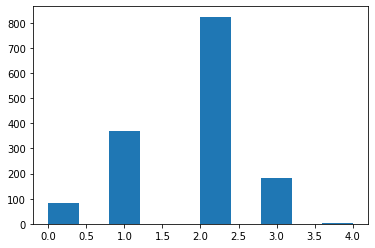

In [33]:
plt.hist(df['GarageCars'])
plt.show()

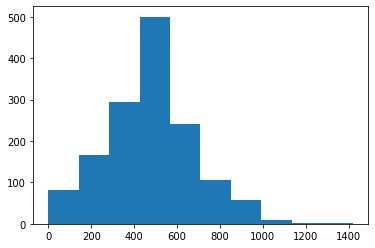

In [34]:
plt.hist(df['GarageArea'])
plt.show()

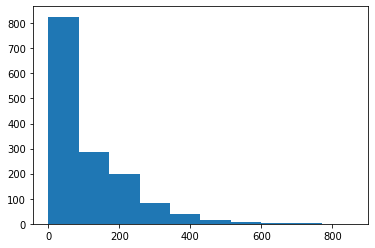

In [35]:
plt.hist(df['WoodDeckSF'])
plt.show()

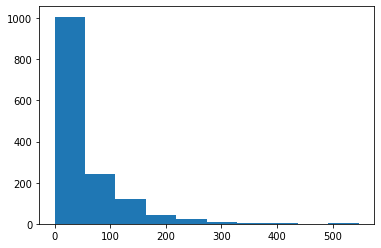

In [36]:
plt.hist(df['OpenPorchSF'])
plt.show()

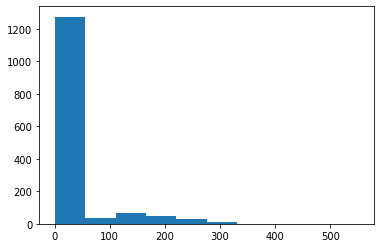

In [37]:
plt.hist(df['EnclosedPorch'])
plt.show()

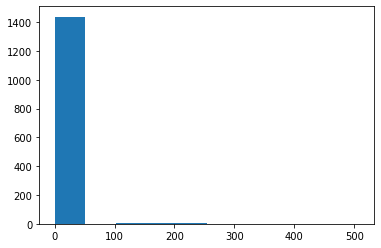

In [38]:
plt.hist(df['3SsnPorch'])
plt.show()

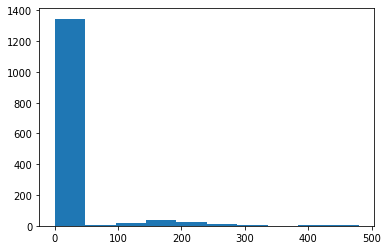

In [39]:
plt.hist(df['ScreenPorch'])
plt.show()

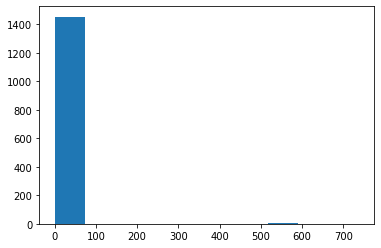

In [40]:
plt.hist(df['PoolArea'])
plt.show()

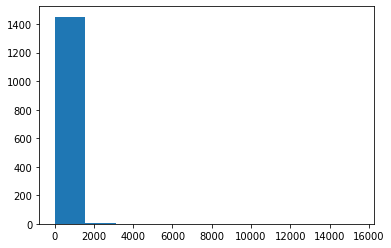

In [41]:
plt.hist(df['MiscVal'])
plt.show()

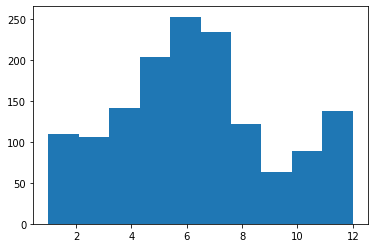

In [42]:
plt.hist(df['MoSold'])
plt.show()

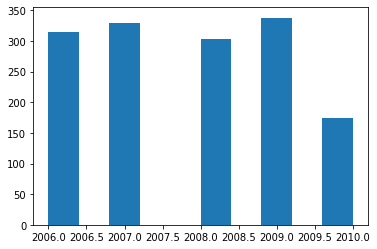

In [43]:
plt.hist(df['YrSold'])
plt.show()

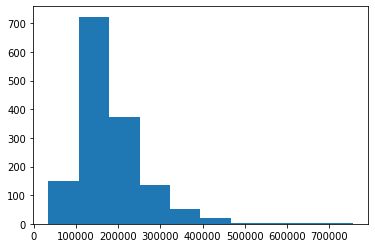

In [44]:
plt.hist(df['SalePrice'])
plt.show()

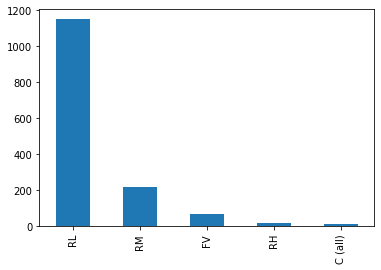

In [45]:
# Visualizations for all categorical variables
df['MSZoning'].value_counts().plot(kind='bar')

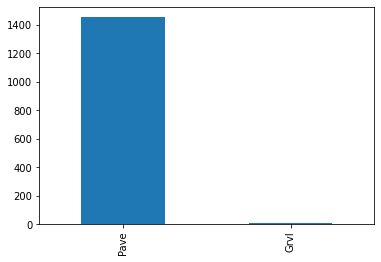

In [46]:
df['Street'].value_counts().plot(kind='bar')

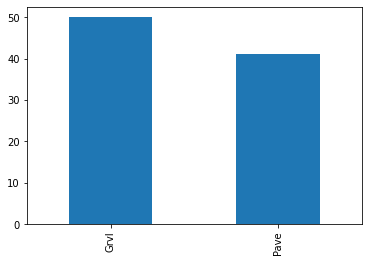

In [47]:
df['Alley'].value_counts().plot(kind='bar')

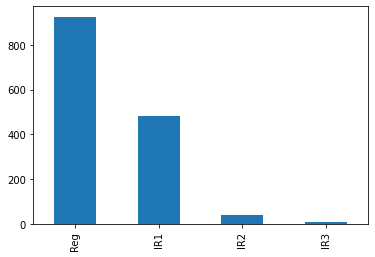

In [48]:
df['LotShape'].value_counts().plot(kind='bar')

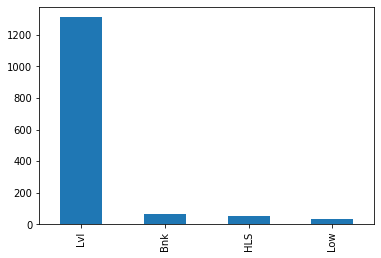

In [49]:
df['LandContour'].value_counts().plot(kind='bar')

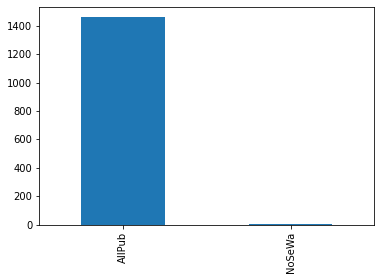

In [50]:
df['Utilities'].value_counts().plot(kind='bar')

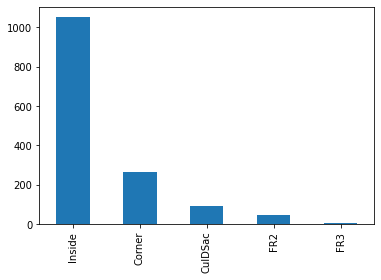

In [51]:
df['LotConfig'].value_counts().plot(kind='bar')

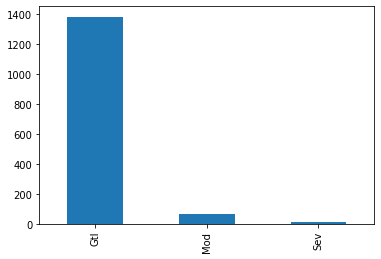

In [52]:
df['LandSlope'].value_counts().plot(kind='bar')

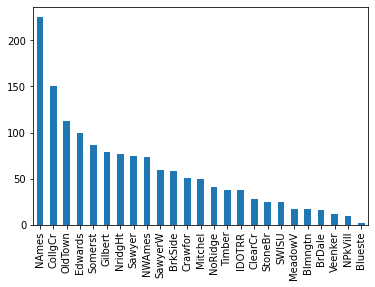

In [53]:
df['Neighborhood'].value_counts().plot(kind='bar')

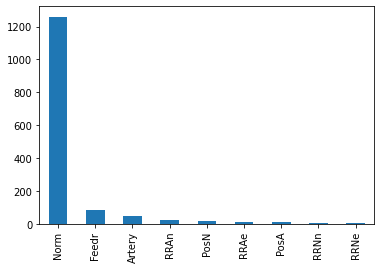

In [54]:
df['Condition1'].value_counts().plot(kind='bar')

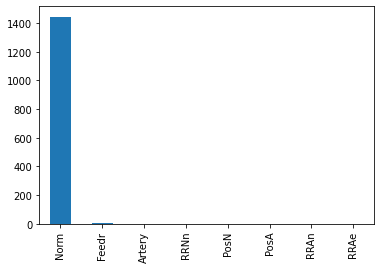

In [55]:
df['Condition2'].value_counts().plot(kind='bar')

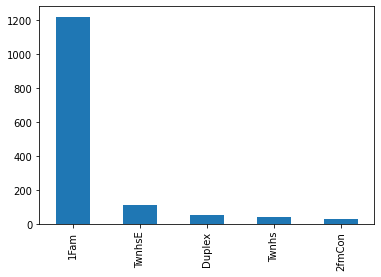

In [56]:
df['BldgType'].value_counts().plot(kind='bar')

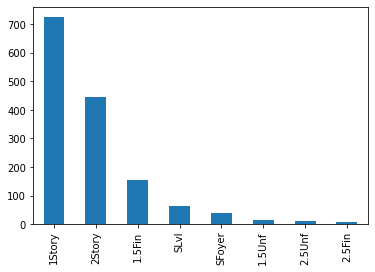

In [57]:
df['HouseStyle'].value_counts().plot(kind='bar')

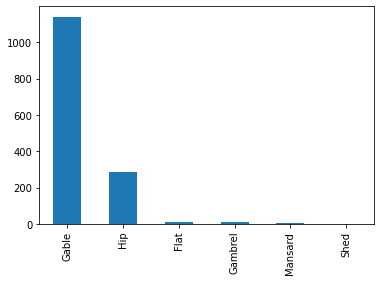

In [58]:
df['RoofStyle'].value_counts().plot(kind='bar')

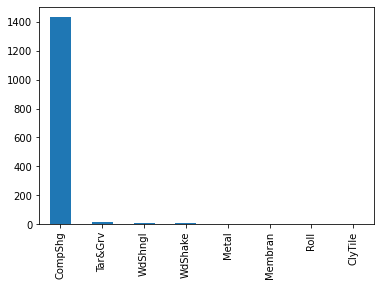

In [59]:
df['RoofMatl'].value_counts().plot(kind='bar')

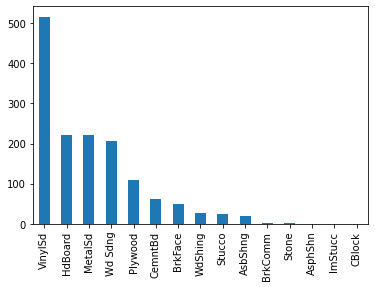

In [60]:
df['Exterior1st'].value_counts().plot(kind='bar')

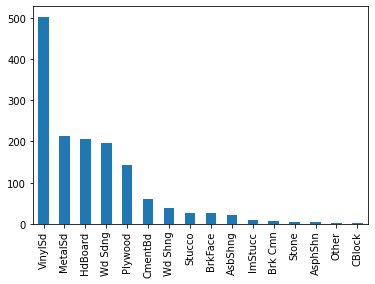

In [61]:
df['Exterior2nd'].value_counts().plot(kind='bar')

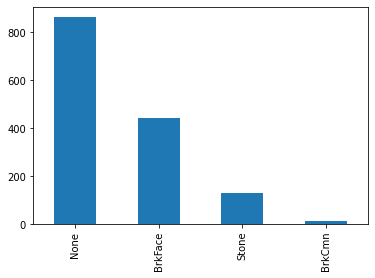

In [62]:
df['MasVnrType'].value_counts().plot(kind='bar')

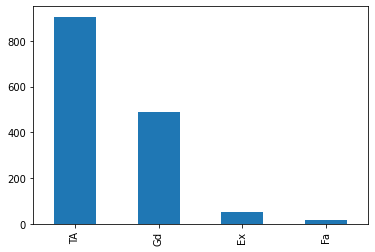

In [63]:
df['ExterQual'].value_counts().plot(kind='bar')

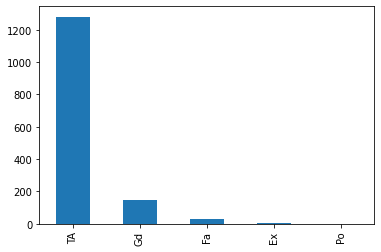

In [64]:
df['ExterCond'].value_counts().plot(kind='bar')

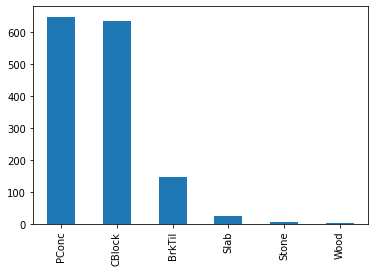

In [65]:
df['Foundation'].value_counts().plot(kind='bar')

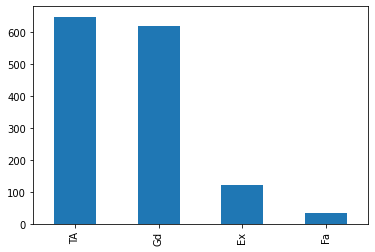

In [66]:
df['BsmtQual'].value_counts().plot(kind='bar')

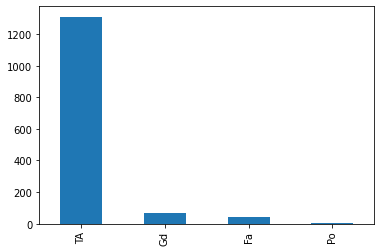

In [67]:
df['BsmtCond'].value_counts().plot(kind='bar')

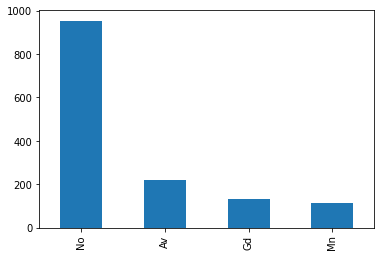

In [68]:
df['BsmtExposure'].value_counts().plot(kind='bar')

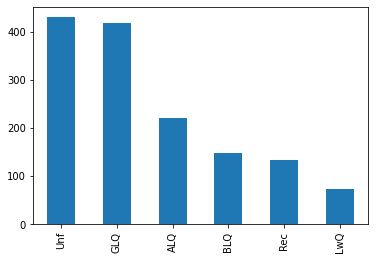

In [69]:
df['BsmtFinType1'].value_counts().plot(kind='bar')

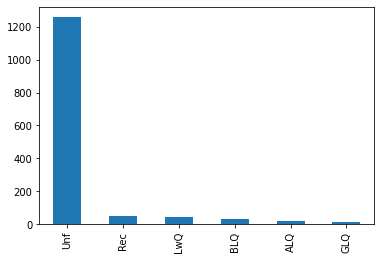

In [70]:
df['BsmtFinType2'].value_counts().plot(kind='bar')

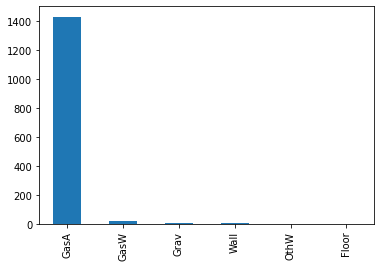

In [71]:
df['Heating'].value_counts().plot(kind='bar')

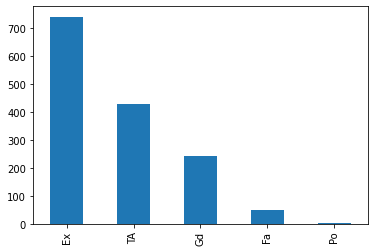

In [72]:
df['HeatingQC'].value_counts().plot(kind='bar')

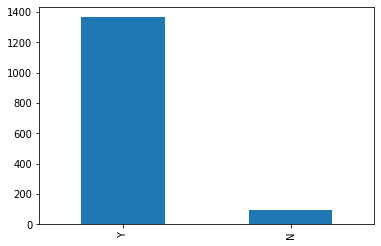

In [73]:
df['CentralAir'].value_counts().plot(kind='bar')

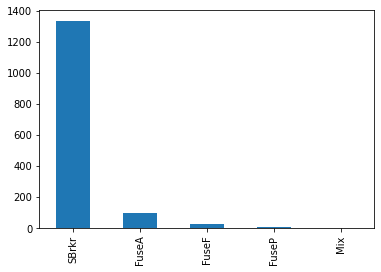

In [74]:
df['Electrical'].value_counts().plot(kind='bar')

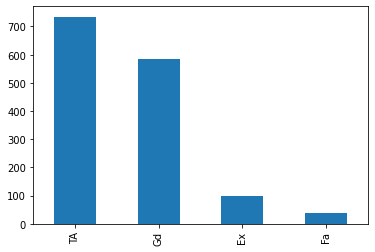

In [75]:
df['KitchenQual'].value_counts().plot(kind='bar')

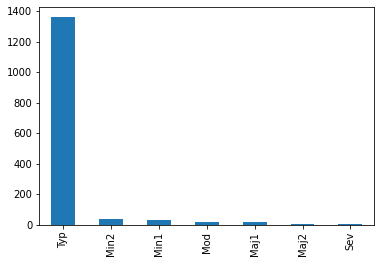

In [76]:
df['Functional'].value_counts().plot(kind='bar')

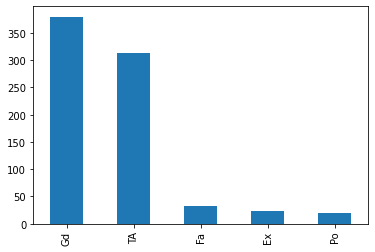

In [77]:
df['FireplaceQu'].value_counts().plot(kind='bar')

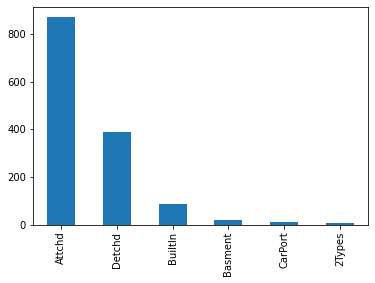

In [78]:
df['GarageType'].value_counts().plot(kind='bar')

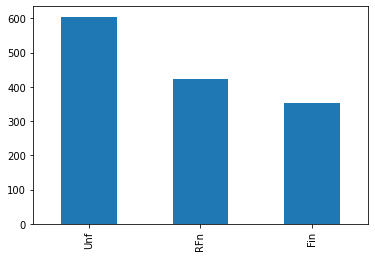

In [79]:
df['GarageFinish'].value_counts().plot(kind='bar')

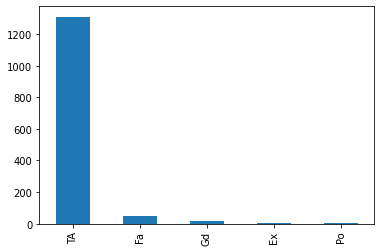

In [80]:
df['GarageQual'].value_counts().plot(kind='bar')

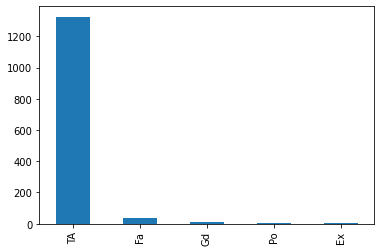

In [81]:
df['GarageCond'].value_counts().plot(kind='bar')

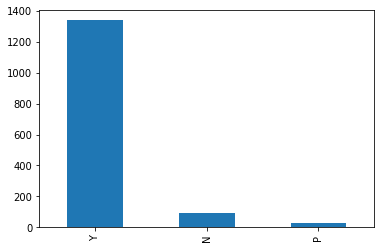

In [82]:
df['PavedDrive'].value_counts().plot(kind='bar')

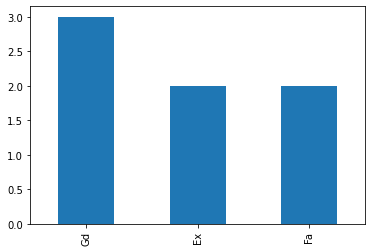

In [83]:
df['PoolQC'].value_counts().plot(kind='bar')

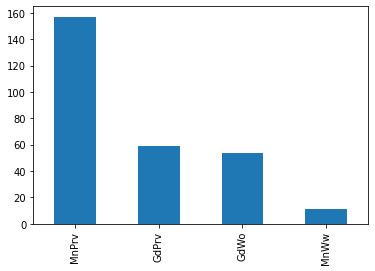

In [84]:
df['Fence'].value_counts().plot(kind='bar')

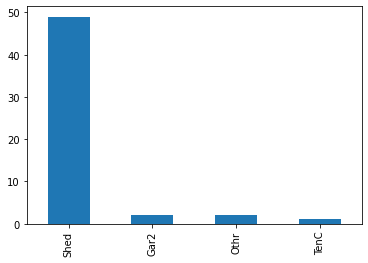

In [85]:
df['MiscFeature'].value_counts().plot(kind='bar')

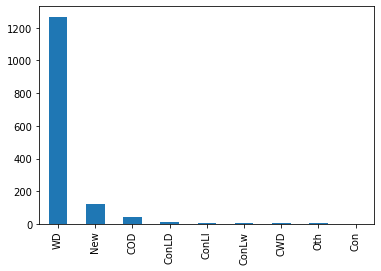

In [86]:
df['SaleType'].value_counts().plot(kind='bar')

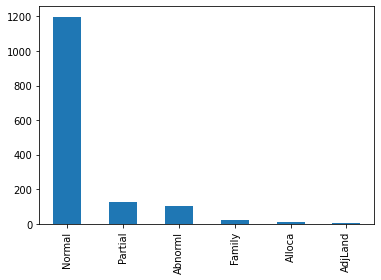

In [87]:
df['SaleCondition'].value_counts().plot(kind='bar')

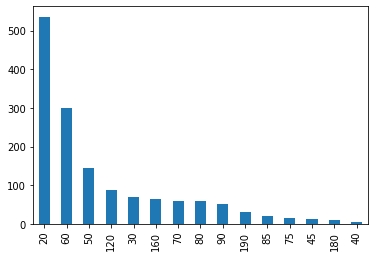

In [88]:
df['MSSubClass'].value_counts().plot(kind='bar')

In [89]:
from pandas.plotting import scatter_matrix

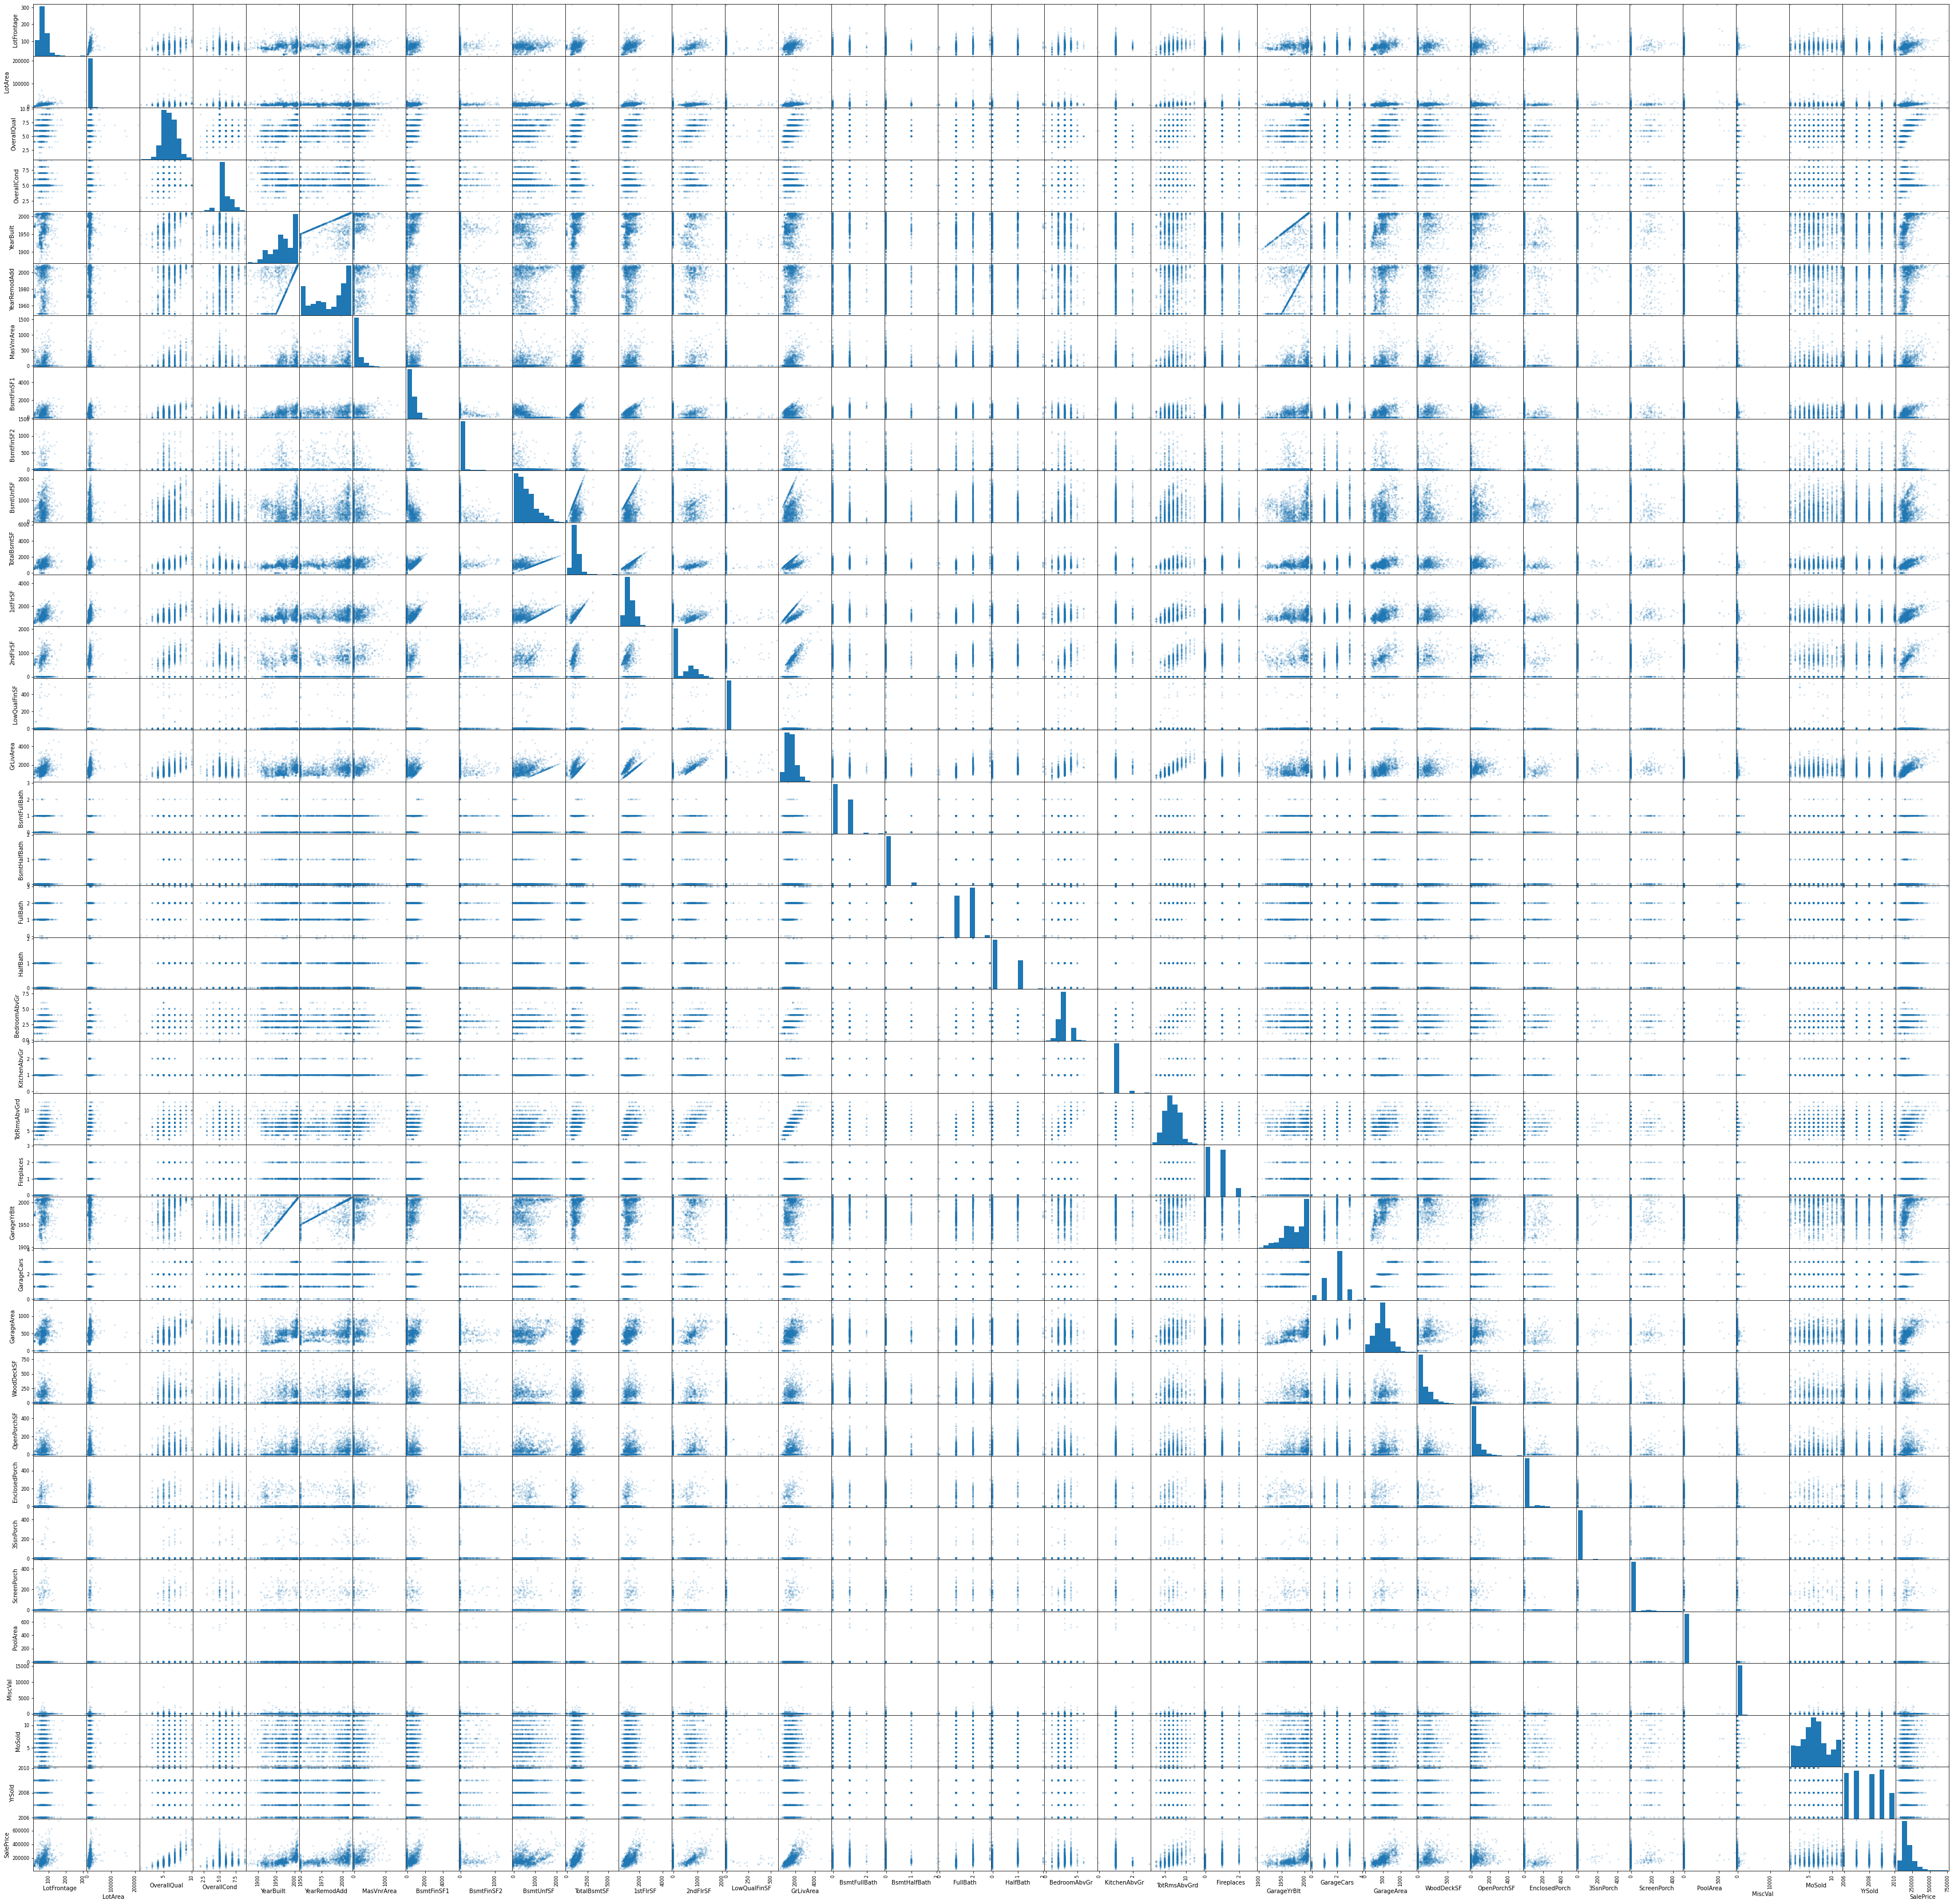

In [90]:
scatter_matrix(df[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']], alpha=0.2, figsize=(60, 60))
plt.show()

In [91]:
categorical_columns = [
    "MSSubClass"
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition"
]

In [92]:
#import seaborn as sns
#sns.pairplot(df, vars=categorical_columns, kind='bar')

# I tried to see the relationship between all the categorical variables but failed.

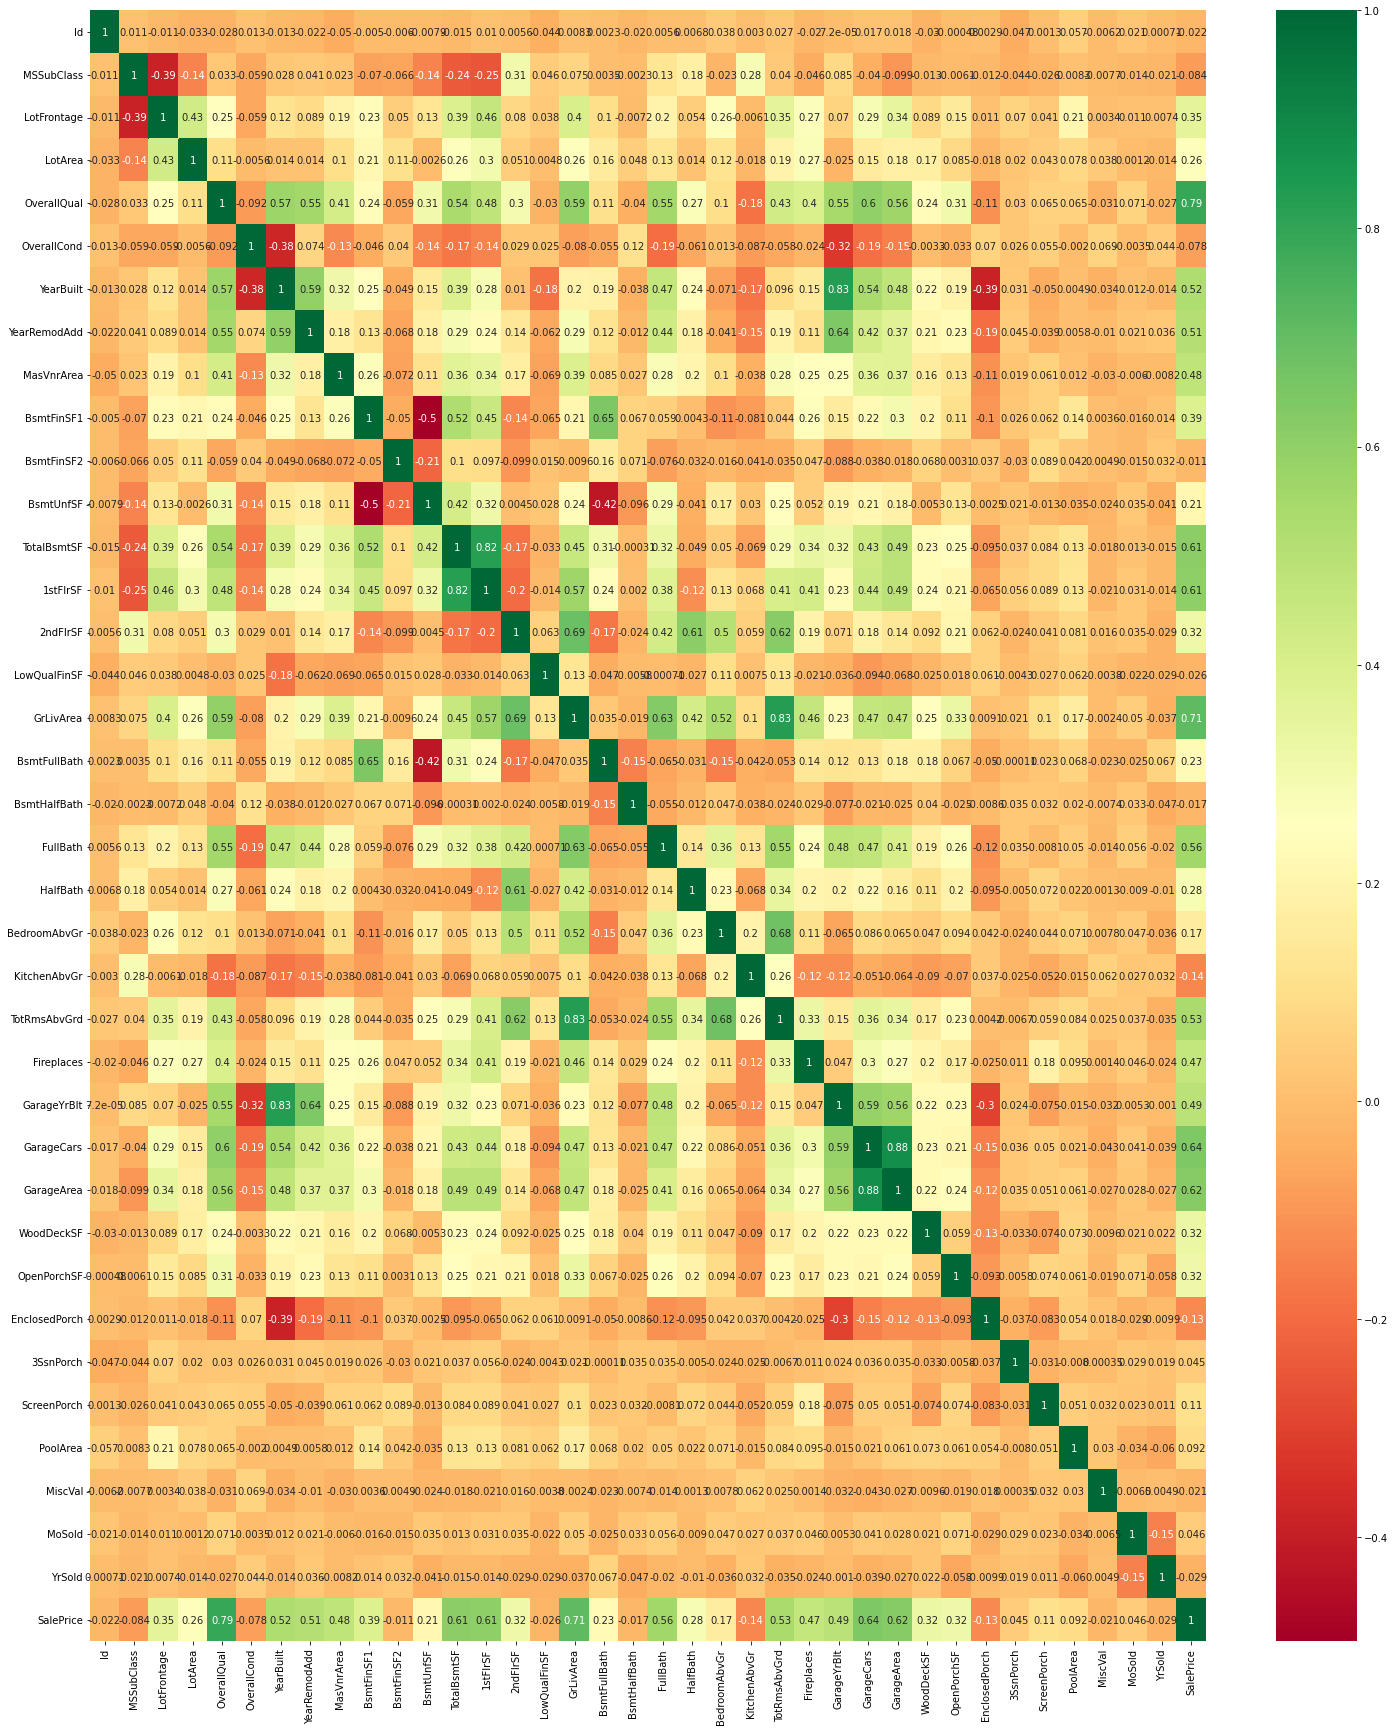

In [93]:
plt.figure(figsize=(25, 30))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

# Looking at the heatmap we can see that there is a lot of multicollinearity

# Data Quality Report

In [94]:
numerical_cols = [
    "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", 
    "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
    "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", 
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SalePrice"
]

In [95]:
import numpy as np

In [106]:
# Let's create the Data Quality Report for the numerical columns

data_quality_report = pd.DataFrame(df[numerical_cols].dtypes, columns=['Data Type'])
data_quality_report['Count'] = df[numerical_cols].count()
data_quality_report['% Missing Values'] = df[numerical_cols].isna().sum()/len(df)*100
data_quality_report['Carinality'] = df[numerical_cols].nunique()
data_quality_report['Minimum'] = df[numerical_cols].min()
data_quality_report['Maximum'] = df[numerical_cols].max()
data_quality_report['Mean'] = df[numerical_cols].mean()
data_quality_report['Median'] = df[numerical_cols].median()
data_quality_report['Standard Deviation'] = df[numerical_cols].std()
data_quality_report['1st Quartile'] = df[numerical_cols].quantile(.25)
data_quality_report['3rd Quartile'] = df[numerical_cols].quantile(.75)

data_quality_report

Data Type  Count  % Missing Values  Carinality  Minimum  \
LotFrontage     float64   1201         17.739726         110     21.0   
LotArea           int64   1460          0.000000        1073   1300.0   
OverallQual       int64   1460          0.000000          10      1.0   
OverallCond       int64   1460          0.000000           9      1.0   
YearBuilt         int64   1460          0.000000         112   1872.0   
YearRemodAdd      int64   1460          0.000000          61   1950.0   
MasVnrArea      float64   1452          0.547945         327      0.0   
BsmtFinSF1        int64   1460          0.000000         637      0.0   
BsmtFinSF2        int64   1460          0.000000         144      0.0   
BsmtUnfSF         int64   1460          0.000000         780      0.0   
TotalBsmtSF       int64   1460          0.000000         721      0.0   
1stFlrSF          int64   1460          0.000000         753    334.0   
2ndFlrSF          int64   1460          0.000000         417      0.0   
LowQualFinSF      int64   1460          0.000000          24      0.0   
GrLivArea         int64   1460          0.000000         861    334.0   
BsmtFullBath      int64   1460          0.000000           4      0.0   
BsmtHalfBath      int64   1460          0.000000           3      0.0   
FullBath          int64   1460          0.000000           4      0.0   
HalfBath          int64   1460          0.000000           3      0.0   
BedroomAbvGr      int64   1460          0.000000           8      0.0   
KitchenAbvGr      int64   1460          0.000000           4      0.0   
TotRmsAbvGrd      int64   1460          0.000000          12      2.0   
Fireplaces        int64   1460          0.000000           4      0.0   
GarageYrBlt     float64   1379          5.547945          97   1900.0   
GarageCars        int64   1460          0.000000           5      0.0   
GarageArea        int64   1460          0.000000         441      0.0   
WoodDeckSF        int64   1460          0.000000         274      0.0   
OpenPorchSF       int64   1460          0.000000         202      0.0   
EnclosedPorch     int64   1460          0.000000         120      0.0   
3SsnPorch         int64   1460          0.000000          20      0.0   
ScreenPorch       int64   1460          0.000000          76      0.0   
PoolArea          int64   1460          0.000000           8      0.0   
MiscVal           int64   1460          0.000000          21      0.0   
MoSold            int64   1460          0.000000          12      1.0   
YrSold            int64   1460          0.000000           5   2006.0   
SalePrice         int64   1460          0.000000         663  34900.0   

                Maximum           Mean    Median  Standard Deviation  \
LotFrontage       313.0      70.049958      69.0           24.284752   
LotArea        215245.0   10516.828082    9478.5         9981.264932   
OverallQual        10.0       6.099315       6.0            1.382997   
OverallCond         9.0       5.575342       5.0            1.112799   
YearBuilt        2010.0    1971.267808    1973.0           30.202904   
YearRemodAdd     2010.0    1984.865753    1994.0           20.645407   
MasVnrArea       1600.0     103.685262       0.0          181.066207   
BsmtFinSF1       5644.0     443.639726     383.5          456.098091   
BsmtFinSF2       1474.0      46.549315       0.0          161.319273   
BsmtUnfSF        2336.0     567.240411     477.5          441.866955   
TotalBsmtSF      6110.0    1057.429452     991.5          438.705324   
1stFlrSF         4692.0    1162.626712    1087.0          386.587738   
2ndFlrSF         2065.0     346.992466       0.0          436.528436   
LowQualFinSF      572.0       5.844521       0.0           48.623081   
GrLivArea        5642.0    1515.463699    1464.0          525.480383   
BsmtFullBath        3.0       0.425342       0.0            0.518911   
BsmtHalfBath        2.0       0.057534       0.0            0.238753   
FullBath        

In [128]:
categorical_columns = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition"
]

In [125]:
import statistics

In [147]:
# Data Quality Report for Categorical Variables

data_quality_report_1 = pd.DataFrame(df[categorical_columns].dtypes, columns=['Data Type'])
data_quality_report_1['% Missing Values'] = (df[categorical_columns].isna().sum()/len(df)*100).round(00)
data_quality_report_1['Cardinality'] = df[categorical_columns].nunique()
for column in categorical_columns:
    mode = df[column].mode()
    data_quality_report_1.at[column, 'Mode'] = mode[0]
    mode_frequency = df[column].value_counts().loc[mode[0]]
    data_quality_report_1.at[column, 'Mode frequency'] = mode_frequency
    mode_percentage = mode_frequency / len(df) * 100
    data_quality_report_1.at[column, 'Mode percentage'] = mode_percentage
    #if df[column].nunique() > 1:
      #data_quality_report_1.at[column, 'Second Mode'] = mode[1]
      #data_quality_report_1.at[column, 'Second Mode frequency'] = df[column].value_counts().loc[mode[1]]
      #data_quality_report_1.at[column, 'Second Mode percentage'] = df[column].value_counts().loc[mode[1]] / len(df) * 100
    #else:
      #data_quality_report_1.at[column, 'Second Mode'] = "N/A"
      #data_quality_report_1.at[column, 'Second Mode frequency'] = "N/A"
      #data_quality_report_1.at[column, 'Second Mode percentage'] = "N/A"

data_quality_report_1


Data Type  % Missing Values  Cardinality     Mode  \
MSZoning         object               0.0            5       RL   
Street           object               0.0            2     Pave   
Alley            object              94.0            2     Grvl   
LotShape         object               0.0            4      Reg   
LandContour      object               0.0            4      Lvl   
Utilities        object               0.0            2   AllPub   
LotConfig        object               0.0            5   Inside   
LandSlope        object               0.0            3      Gtl   
Neighborhood     object               0.0           25    NAmes   
Condition1       object               0.0            9     Norm   
Condition2       object               0.0            8     Norm   
BldgType         object               0.0            5     1Fam   
HouseStyle       object               0.0            8   1Story   
RoofStyle        object               0.0            6    Gable   
RoofMatl         object               0.0            8  CompShg   
Exterior1st      object               0.0           15  VinylSd   
Exterior2nd      object               0.0           16  VinylSd   
MasVnrType       object               1.0            4     None   
ExterQual        object               0.0            4       TA   
ExterCond        object               0.0            5       TA   
Foundation       object               0.0            6    PConc   
BsmtQual         object               3.0            4       TA   
BsmtCond         object               3.0            4       TA   
BsmtExposure     object               3.0            4       No   
BsmtFinType1     object               3.0            6      Unf   
BsmtFinType2     object               3.0            6      Unf   
Heating          object               0.0            6     GasA   
HeatingQC        object               0.0            5       Ex   
CentralAir       object               0.0            2        Y   
Electrical       object               0.0            5    SBrkr   
KitchenQual      object               0.0            4       TA   
Functional       object               0.0            7      Typ   
FireplaceQu      object              47.0            5       Gd   
GarageType       object               6.0            6   Attchd   
GarageFinish     object               6.0            3      Unf   
GarageQual       object               6.0            5       TA   
GarageCond       object               6.0            5       TA   
PavedDrive       object               0.0            3        Y   
PoolQC           object             100.0            3       Gd   
Fence            object              81.0            4    MnPrv   
MiscFeature      object              96.0            4     Shed   
SaleType         object               0.0            9       WD   
SaleCondition    object               0.0            6   Normal   

               Mode frequency  Mode percentage  
MSZoning               1151.0        78.835616  
Street                 1454.0        99.589041  
Alley                    50.0         3.424658  
LotShape                925.0        63.356164  
LandContour            1311.0        89.794521  
Utilities              1459.0        99.931507  
LotConfig              1052.0        72.054795  
LandSlope              1382.0        94.657534  
Neighborhood            225.0        15.410959  
Condition1             1260.0        86.301370  
Condition2             1445.0        98.972603  
BldgType               1220.0        83.561644  
HouseStyle              726.0        49.726027  
RoofStyle              1141.0        78.150685  
RoofMatl               1434.0        98.219178  
Exterior1st             515.0        35.273973  
Exterior2nd             504.0        34.520548  
MasVnrType              864.0        59.178082  
ExterQual               906.0        62.054795  
ExterCond              1282.0        87.808219  
Foundation              647.0       

In [152]:
# Refering back to line 8 we identified 259 missing values for the column LotFrontage
#pd.set_option('display.max_columns',None)
print(df.isna().sum())
pd.set_option('display.max_columns',None)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [153]:
# In order to decide whether or not we should drop a variable depends on the % of missing value under each variable
df.isna().sum()/len(df)*100

# Alley, PoolQC, Fence, MiscFeature

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
# Feature       |     Data Quality Issue    |     Potential Handling Strategies
#-------------------------------------------------------------------------------
# GarageYrBlt   | 5.547945 % Missing Values | Impute with mean
# MasVnrArea    | 0.547945 % Missing Values | Impute with mean
# LotFrontage   | 17.739726 % Missing Values| Impute with mean
# PoolQC        | 99.520548 % Missing Values| Drop the whole column
# FireplaceQu   | 47.0 % Missing Values     | Impute with mode
# BsmtFinType2  | 3.0 % Missing Values      | Drop the row
# BsmtFinType1  | 3.0 % Missing Values      | Drop the row
# BsmtExposure  | 3.0 % Missing Values      | Drop the row
# BsmtCond      | 3.0 % Missing Values      | Drop the row
# BsmtQual      | 3.0 % Missing Values      | Drop the row
# MasVnrType    | 1.0 % Missing Values      | Drop the row
# Alley         | 94.0 % Missing Values     | Drop the whole column
# MiscFeature   | 96.301370 % Missing Values| Drop the whole column
# Fence         | 80.753425 % Missing Values| Drop the whole column
# Electrical    | 0.068493 % Missing Values | Drop the row
# GarageCond    | 5.547945 % Missing Values | Drop the row
# GarageQual    | 5.547945 % Missing Values | Drop the row

# Data Pre-processing

In [159]:
# Looking into all the variables with missing values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
df[nan_cols].isnull().sum()/len(df) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [161]:
new_df = df.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=False)
new_df.shape

(1460, 77)

In [165]:
nan_cols = [i for i in new_df.columns if new_df[i].isnull().any()]
df[nan_cols].isnull().sum()/len(new_df) * 100

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [163]:
# Impute LotFrontage with the mean
new_df.LotFrontage.fillna(value= new_df.LotFrontage.mean(), inplace = True)
new_df.LotFrontage.isna().sum()

0

In [164]:
# Drop the column FireplcaeQu
new_df=new_df.drop(["FireplaceQu"], axis =1, inplace= False)

In [166]:
# Drop all the rows with less than 10% missing values
new_df.dropna(inplace=True)

In [167]:
new_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [171]:
new_df.shape

(1338, 76)

In [172]:
# Drop all duplicates
print(new_df.duplicated().sum())

0


In [173]:
# Check for outliers
# For the simplicity of this assignment I will look into only Sales Price
new_df["SalePrice"].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [180]:
SalePrice_Q1 = new_df["SalePrice"].quantile(0.25)
SalePrice_Q3 = new_df["SalePrice"].quantile(0.75)
SalePrice_IQR = SalePrice_Q3 - SalePrice_Q1
print(SalePrice_Q1)
print(SalePrice_Q3)
print(f"IQR of Sale Price: {SalePrice_IQR}")

135000.0
220000.0
IQR of Sale Price: 85000.0


In [181]:
lower_limit = SalePrice_Q1 - 1.5 * SalePrice_IQR
upper_limit = SalePrice_Q3 + 1.5 * SalePrice_IQR
print(f"The Lower Limit is:{lower_limit} and The Upper Limit is:{upper_limit}")

The Lower Limit is:7500.0 and The Upper Limit is:347500.0


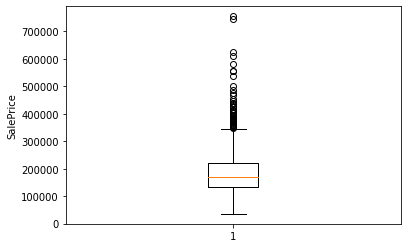

In [182]:
# Using a boxplot to see the spread of the data for Sales Price
plt.boxplot(new_df['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [183]:
# Remove all the outliers for Sales Price
new_df['SalePrice']= new_df['SalePrice'].clip(lower=7500.0, upper=347500.0)

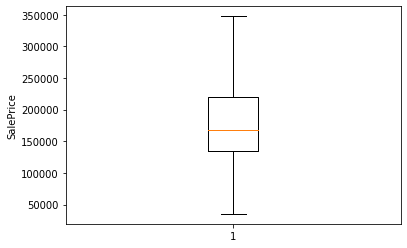

In [184]:
# Using another boxplot to see if the outliers have been removed
plt.boxplot(new_df['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [186]:
# Basic statistics for sales price
new_df['SalePrice'].describe()

count      1338.000000
mean     183260.615097
std       66771.055082
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      347500.000000
Name: SalePrice, dtype: float64

# Post-Processing

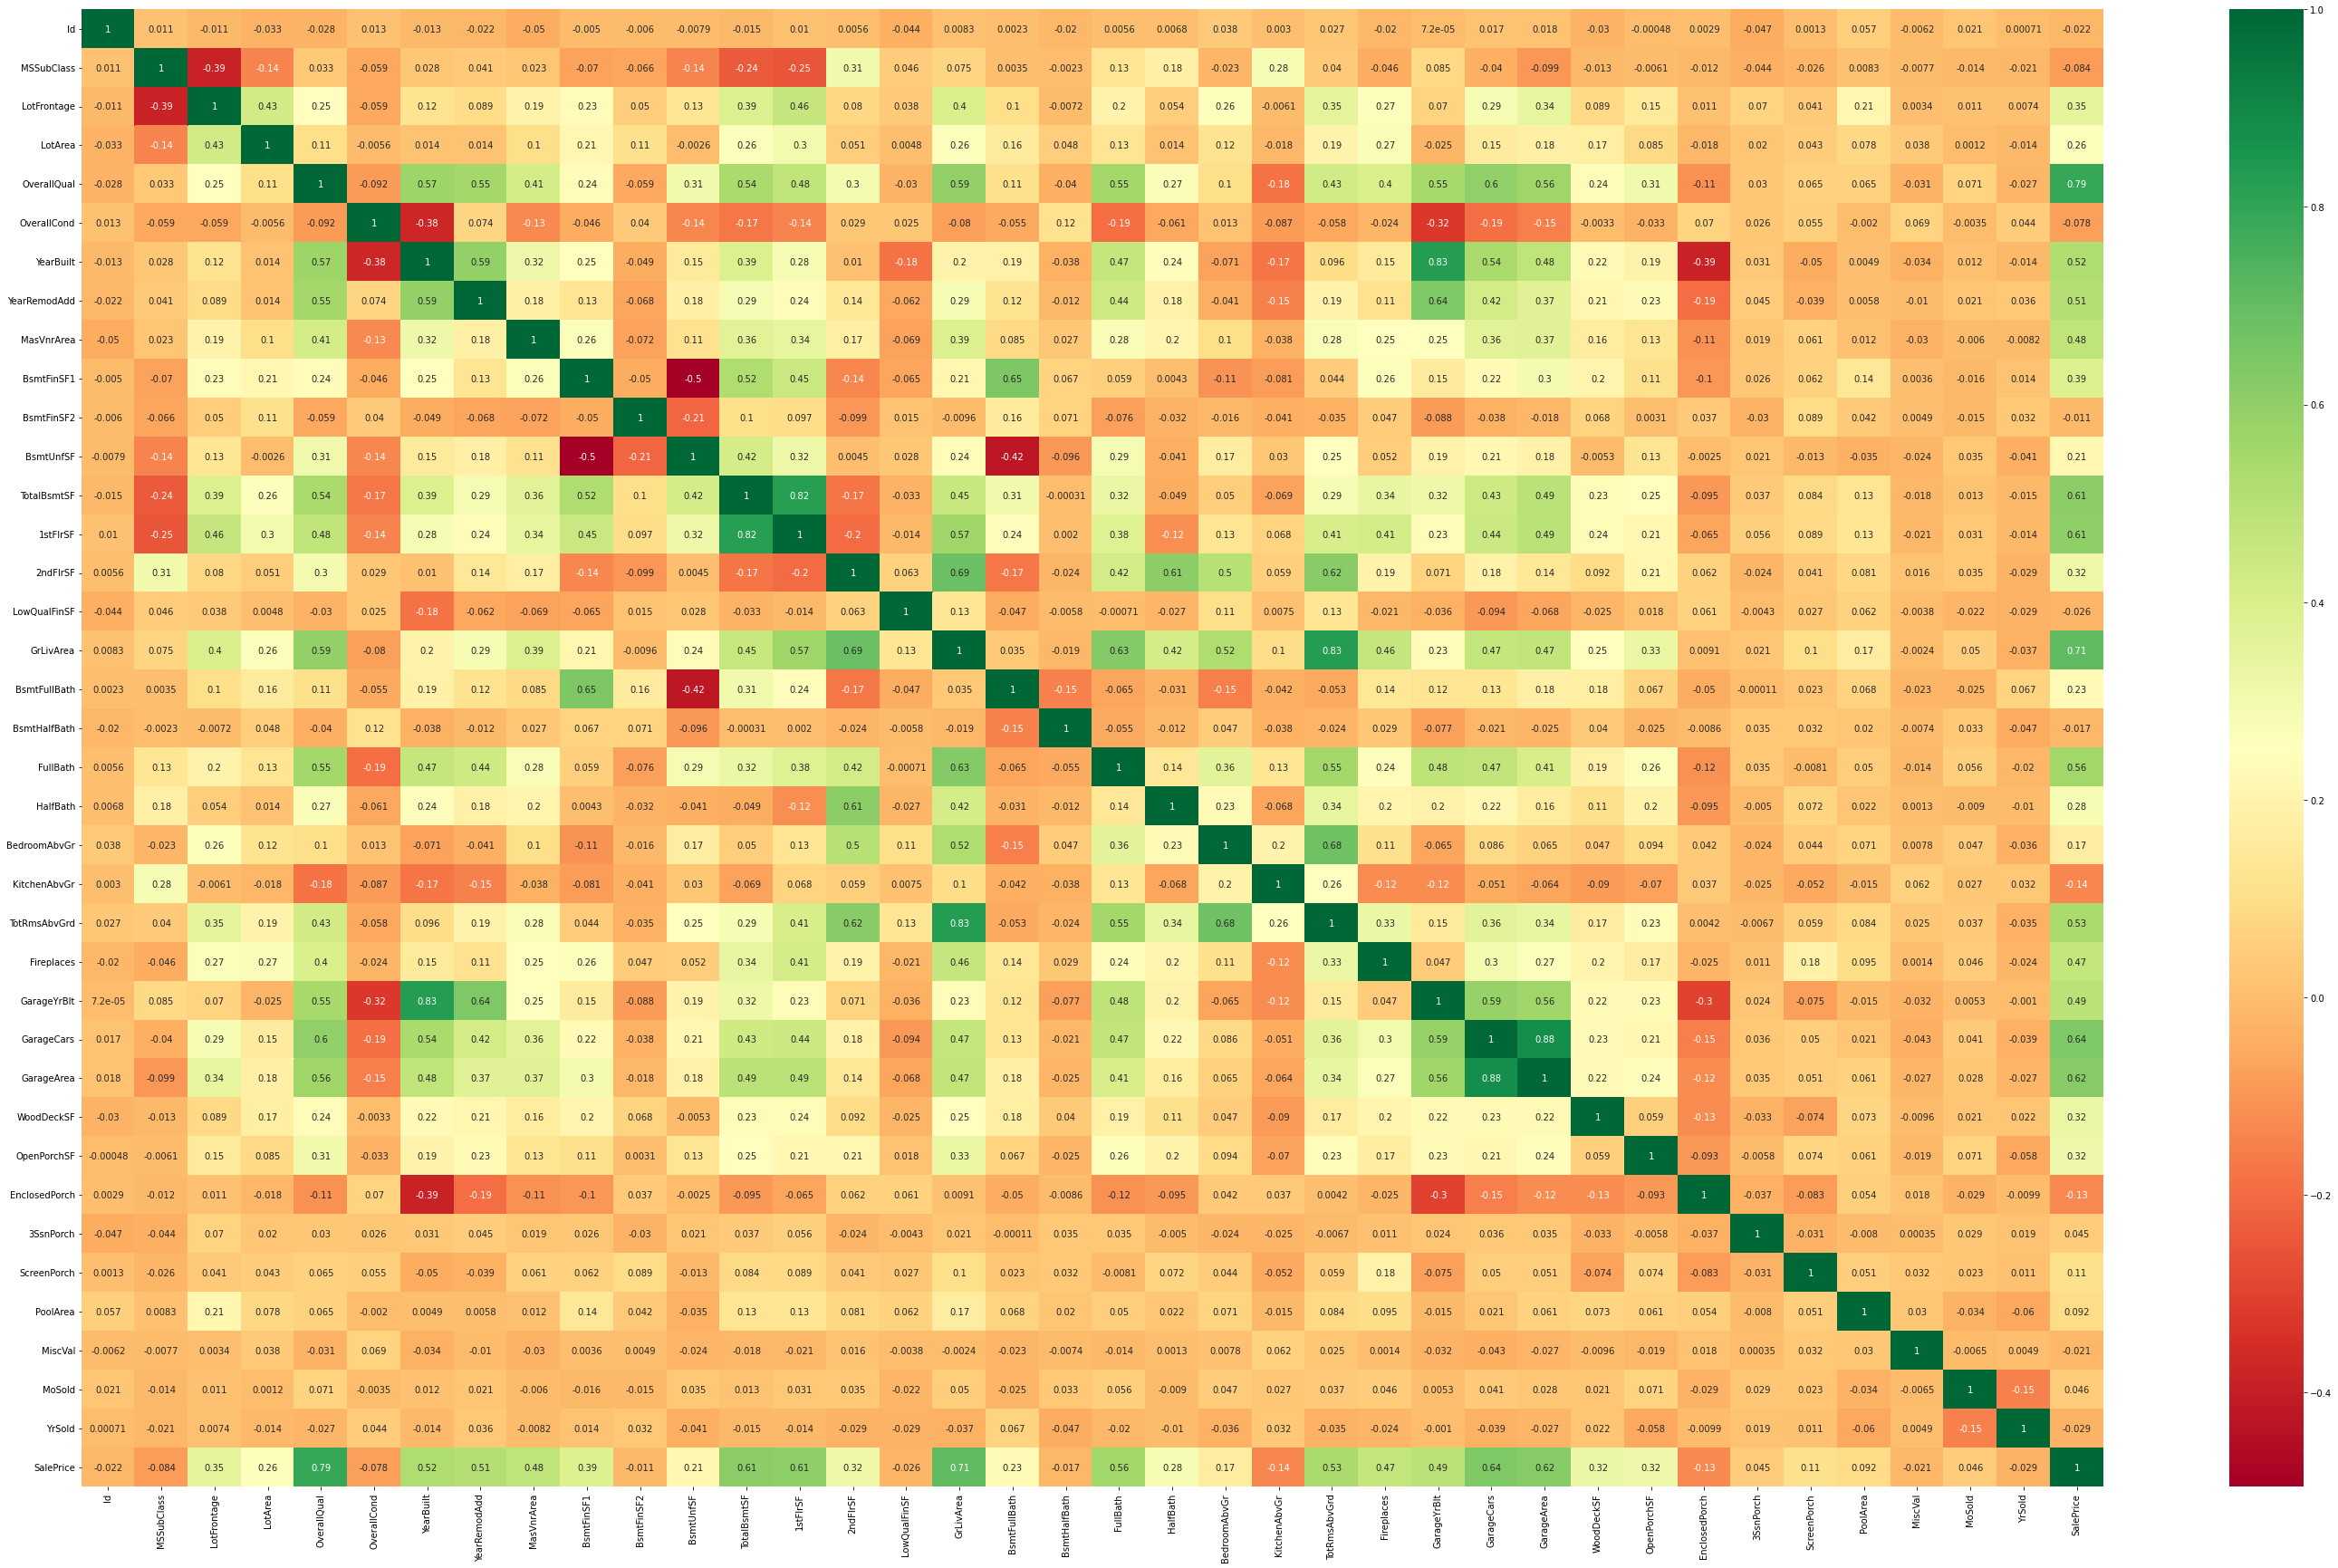

In [188]:
# Check for multicollinearity
plt.figure(figsize=(50, 30))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [ ]:
# Features that we think need to be dropped
# 1stflrSF, TotalRmsAbvGrd, GarageCars, GarageYrBlt bc those independent variables are highly correlated with some other variables with a correlation coefficient greater than 0.8
# Id, MsSubClass, OverallCond, BsmtFinsSF, LowQualFinSF, BsmtHalfBath, PoolArea, 3SsnPorch, MiscVal, MoSold, YrSold should also be removed because these variables have an extremely low correlation with Sales Price